## Q1

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sys
import numpy as np
import scipy.spatial.distance as distance
import random


### First dataset

### Implementation of CURE

In [6]:
# Returns the distance between two vectors
def dist(vecA, vecB):
    return np.sqrt(np.power(vecA - vecB, 2).sum())

# This class describes the data structure and method of operation for CURE clustering.
class CureCluster:
    def __init__(self, id__, center__):
        self.points = center__
        self.repPoints = center__
        self.center = center__
        self.index = [id__]
        
    def __repr__(self):
        return "Cluster " + " Size: " + str(len(self.points))
    
    # Computes and stores the centroid of this cluster, based on its points
    def computeCentroid(self, clust):
        totalPoints_1 = len(self.index)
        totalPoints_2 = len(clust.index)
        self.center = (self.center*totalPoints_1 + clust.center*totalPoints_2) / (totalPoints_1 + totalPoints_2)
    
    # Computes and stores representative points for this cluster
    def generateRepPoints(self, numRepPoints, alpha):
        tempSet = None
        for i in range(1, numRepPoints+1):
            maxDist = 0
            maxPoint = None
            for p in range(0, len(self.index)):
                if i == 1:
                    minDist = dist(self.points[p,:], self.center)
                else:
                    X = np.vstack([tempSet, self.points[p, :]])
                    tmpDist = distance.pdist(X)
                    minDist = tmpDist.min()
                if minDist >= maxDist:
                    maxDist = minDist
                    maxPoint = self.points[p,:]
            if tempSet is None:
                tempSet = maxPoint
            else:
                tempSet = np.vstack((tempSet, maxPoint))
        for j in range(len(tempSet)):
            if self.repPoints is None:
                self.repPoints = tempSet[j,:] + alpha * (self.center - tempSet[j,:])
            else:
                self.repPoints = np.vstack((self.repPoints, tempSet[j,:] + alpha * (self.center - tempSet[j,:])))

    # Computes and stores distance between this cluster and the other one.
    def distRep(self, clust):
        distRep = float('inf')
        for repA in self.repPoints:
            if type(clust.repPoints[0]) != list:
                repB = clust.repPoints
                distTemp = dist(repA, repB)
                if distTemp < distRep:
                    distRep = distTemp
            else:
                for repB in clust.repPoints:
                    distTemp = dist(repA, repB)
                    if distTemp < distRep:
                        distRep = distTemp
        return distRep

    # Merges this cluster with the given cluster, recomputing the centroid and the representative points.
    def mergeWithCluster(self, clust, numRepPoints, alpha):
        self.computeCentroid(clust)
        self.points = np.vstack((self.points, clust.points))
        self.index = np.append(self.index, clust.index)
        self.repPoints = None
        self.generateRepPoints(numRepPoints, alpha)

# Describe the process of the CURE algorithm
def runCURE(data, numRepPoints, alpha, numDesCluster):

    # Initialization
    Clusters = []
    numCluster = len(data)
    numPts = len(data)
    distCluster = np.ones([len(data), len(data)])
    distCluster = distCluster * float('inf')
    for idPoint in range(len(data)):
        newClust = CureCluster(idPoint, data[idPoint,:])
        Clusters.append(newClust)
    for row in range(0, numPts):
        for col in range(0, row):
            distCluster[row][col] = dist(Clusters[row].center, Clusters[col].center)
    while numCluster > numDesCluster:
        minIndex = np.where(distCluster == np.min(distCluster))
        minIndex1 = minIndex[0][0]
        minIndex2 = minIndex[1][0]
        # Merge
        Clusters[minIndex1].mergeWithCluster(Clusters[minIndex2], numRepPoints, alpha)
        # Update the distCluster matrix
        for i in range(0, minIndex1):
            distCluster[minIndex1, i] = Clusters[minIndex1].distRep(Clusters[i])
        for i in range(minIndex1+1, numCluster):
            distCluster[i, minIndex1] = Clusters[minIndex1].distRep(Clusters[i])
        # Delete the merged cluster and its disCluster vector.
        distCluster = np.delete(distCluster, minIndex2, axis=0)
        distCluster = np.delete(distCluster, minIndex2, axis=1)
        del Clusters[minIndex2]
        numCluster = numCluster - 1

    print('Cluster count:', numCluster)
    # Generate sample labels
    Label = [0] * numPts
    for i in range(0, len(Clusters)):
        for j in range(0, len(Clusters[i].index)):
            Label[Clusters[i].index[j]] = i + 1
    return Label,Clusters

### Part A,B for moon dataset

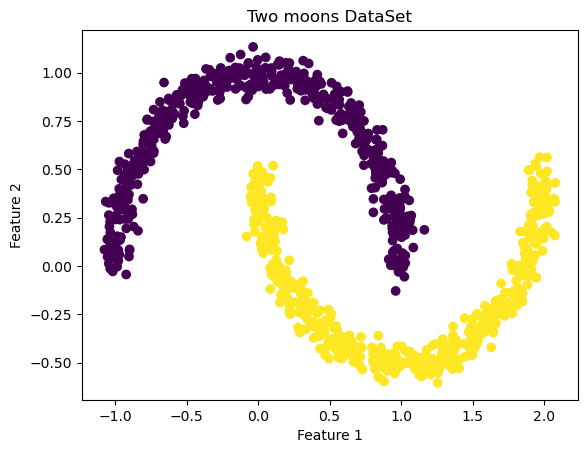

In [7]:
dataset1_X, dataset1_y = make_moons(n_samples=1000, noise=0.05, random_state=0)
plt.scatter(dataset1_X[:, 0], dataset1_X[:, 1], c=dataset1_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two moons DataSet')
plt.show()

### sample 200 item randomly

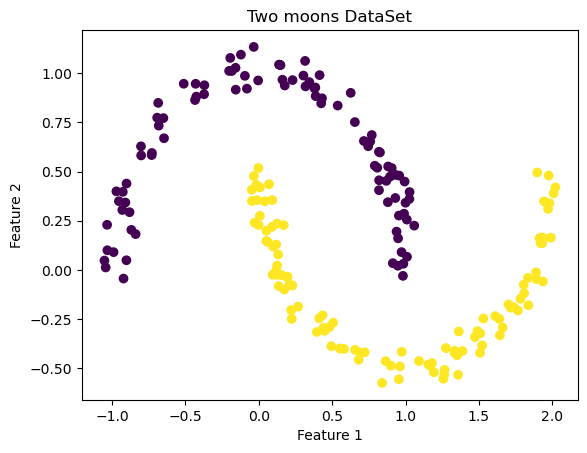

In [8]:
_, X_200, _, y_200 = train_test_split(dataset1_X, dataset1_y, test_size=0.2, random_state=42)
plt.scatter(X_200[:, 0], X_200[:, 1], c=y_200)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two moons DataSet')
plt.show()

Cluster count: 2


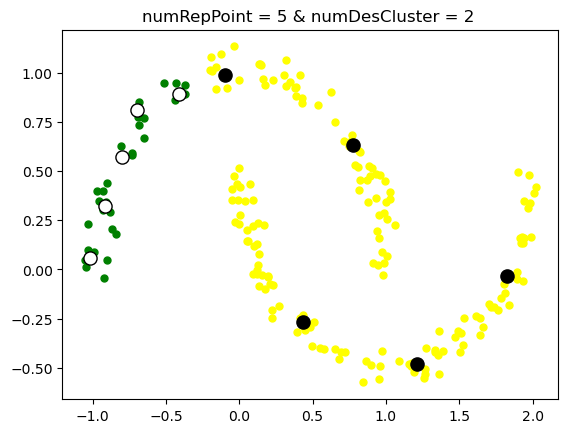

Cluster count: 2


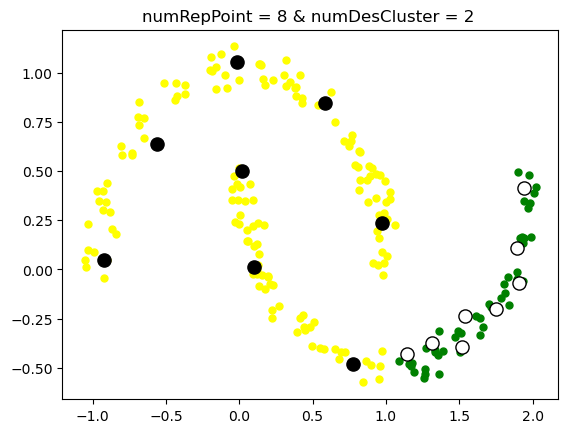

Cluster count: 2


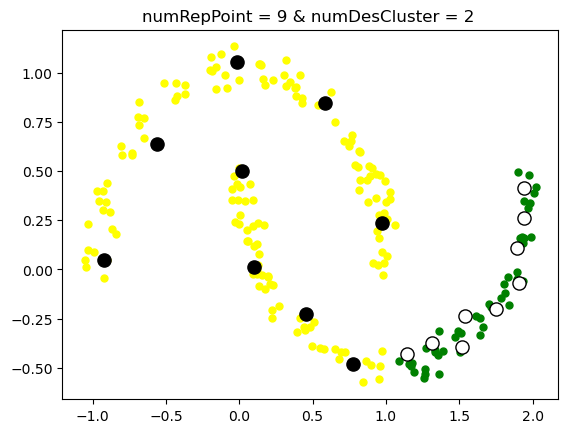

Cluster count: 2


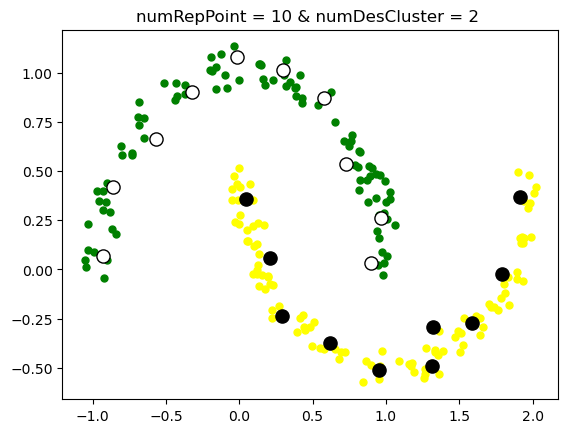

Cluster count: 2


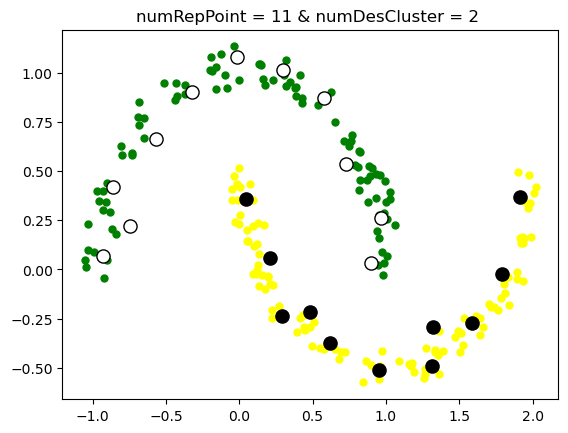

Cluster count: 3


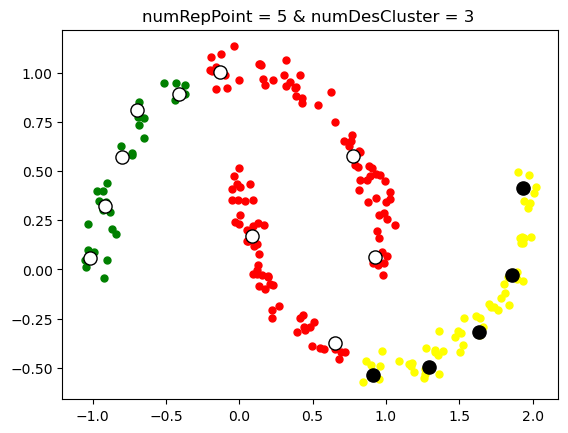

Cluster count: 3


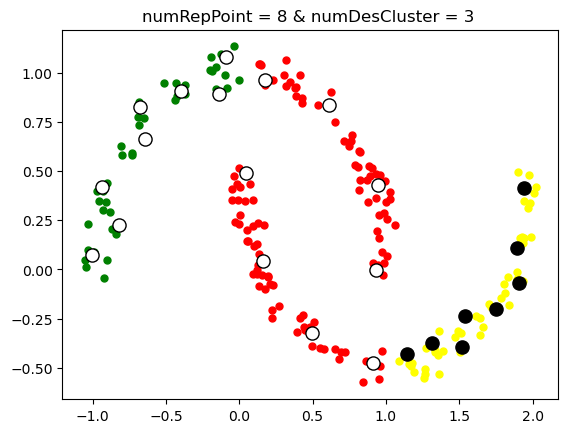

Cluster count: 3


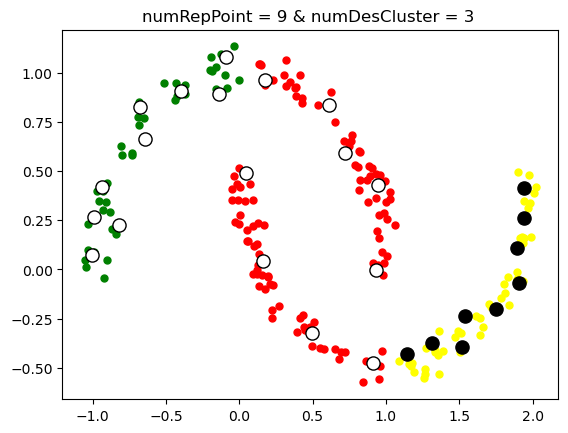

Cluster count: 3


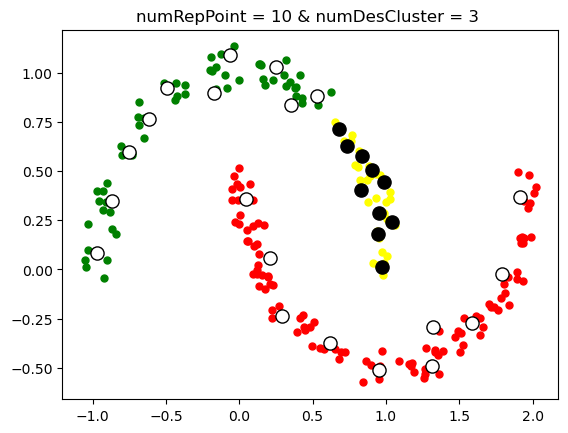

Cluster count: 3


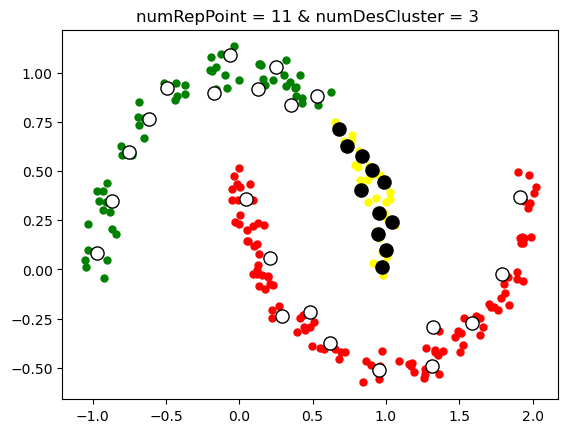

In [9]:

alpha = 0.1

numRepPoints_array = [5,8,9,10,11]
numDesCluster_array = [2,3]
data = X_200
data_set = X_200
for numDesCluster in numDesCluster_array:
    for numRepPoints in numRepPoints_array:
        Label_pre,clusters = runCURE(data, numRepPoints, alpha, numDesCluster)
        scatterColors = ['blue', 'green', 'yellow', 'red', 'purple', 'orange', 'brown', 'cyan', 'brown',
                         'chocolate', 'darkgreen', 'darkblue', 'azure', 'bisque']
        Colors = ['white','black']
        for i in range(data_set.shape[0]):
            color = scatterColors[Label_pre[i]]
            plt.scatter(data_set[i, 0], data_set[i, 1], marker='.', c=color,s=100)
#             plt.rcParams["figure.autolayout"] = True
        c_const = 'black'
        for item in clusters:
            if c_const == 'black':
                c_const = 'white'
            else:
                c_const = 'black'
            for i in range(len(item.repPoints)):
                plt.scatter(item.repPoints[i][0], item.repPoints[i][1], marker='o',edgecolor = 'black',c =c_const ,s=90)
#                 plt.rcParams["figure.autolayout"] = True
        plt.title(f'numRepPoint = {numRepPoints} & numDesCluster = {numDesCluster} ')
        plt.show()

### numRepPoint = 10 & numDesCluster = 2 could be a reasonable choice

Cluster count: 2


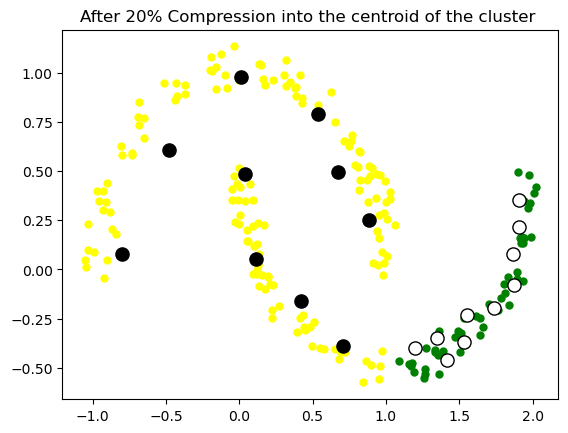

In [13]:
alpha = 0.2
Label_pre,clusters = runCURE(data, 10, alpha, 2)
scatterColors = ['blue', 'green', 'yellow', 'red', 'purple', 'orange', 'brown', 'cyan', 'brown',
                 'chocolate', 'darkgreen', 'darkblue', 'azure', 'bisque']
Colors = ['white','black']
for i in range(data_set.shape[0]):
    color = scatterColors[Label_pre[i]]
    plt.scatter(data_set[i, 0], data_set[i, 1], marker='.', c=color,s=100)
#             plt.rcParams["figure.autolayout"] = True
c_const = 'black'
for item in clusters:
    if c_const == 'black':
        c_const = 'white'
    else:
        c_const = 'black'
    for i in range(len(item.repPoints)):
        plt.scatter(item.repPoints[i][0], item.repPoints[i][1], marker='o',edgecolor = 'black',c =c_const ,s=90)
#                 plt.rcParams["figure.autolayout"] = True
plt.title(f'After 20% Compression into the centroid of the cluster ')
plt.show()

Cluster count: 2


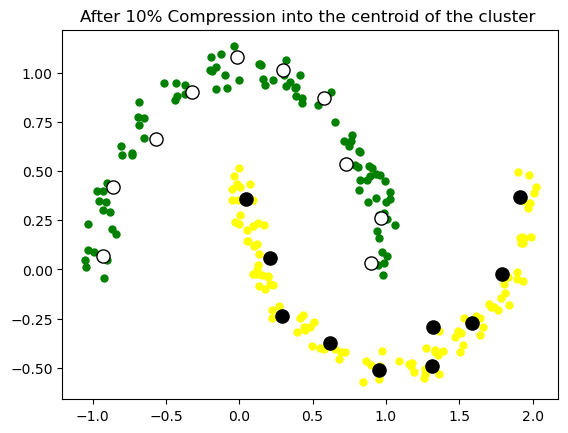

In [14]:
alpha = 0.1
Label_pre,clusters = runCURE(data, 10, alpha, 2)
scatterColors = ['blue', 'green', 'yellow', 'red', 'purple', 'orange', 'brown', 'cyan', 'brown',
                 'chocolate', 'darkgreen', 'darkblue', 'azure', 'bisque']
Colors = ['white','black']
for i in range(data_set.shape[0]):
    color = scatterColors[Label_pre[i]]
    plt.scatter(data_set[i, 0], data_set[i, 1], marker='.', c=color,s=100)
#             plt.rcParams["figure.autolayout"] = True
c_const = 'black'
for item in clusters:
    if c_const == 'black':
        c_const = 'white'
    else:
        c_const = 'black'
    for i in range(len(item.repPoints)):
        plt.scatter(item.repPoints[i][0], item.repPoints[i][1], marker='o',edgecolor = 'black',c =c_const ,s=90)
#                 plt.rcParams["figure.autolayout"] = True
plt.title(f'After 10% Compression into the centroid of the cluster ')
plt.show()

In [15]:
print("_________________________________________")
for i in range(len(clusters)):
    print(f'{i+1}th {clusters[i]}')
    print("_________________________________________")

_________________________________________
1th Cluster  Size: 94
_________________________________________
2th Cluster  Size: 106
_________________________________________


### Part C

In [16]:
from scipy.spatial import distance
check_list = []
for i in range(len(clusters)):
    for j in range(len(clusters[i].repPoints)):
        check_list.append((clusters[i].repPoints[j][0], clusters[i].repPoints[j][1],i))
final_list = []
for point in dataset1_X:
    min_dist = float('inf')
    cluster_index = -1
    for rep_point in check_list:
        if distance.euclidean(point,(rep_point[0],rep_point[1]))<= min_dist:
            min_dist = distance.euclidean(point,(rep_point[0],rep_point[1]))
            cluster_index = rep_point[2]
    final_list.append((point[0],point[1],cluster_index))


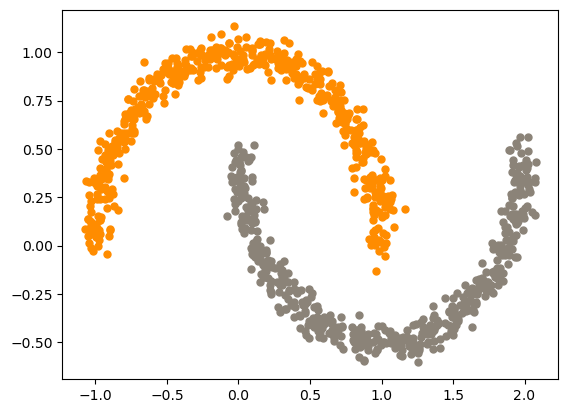

In [18]:
for point in final_list:
    if point[2] == 0:
        plt.scatter(point[0],point[1], marker='.', c="darkorange",s=100)
    if point[2] == 1:
        plt.scatter(point[0],point[1], marker='.', c="#8B8378",s=100)
#     if point[2] == 2:
#         plt.scatter(point[0],point[1], marker='.', c="olive",s=100)
#     if point[2] == 3:
#         plt.scatter(point[0],point[1], marker='.', c="#8A360F",s=100)
#     if point[2] == 4:
#         plt.scatter(point[0],point[1], marker='.', c="#E3CF57",s=100)
#     if point[2] == 5:
#         plt.scatter(point[0],point[1], marker='.', c="#DC143C",s=100)
        

### Second dataset

### Part A,B for Spirals dataset

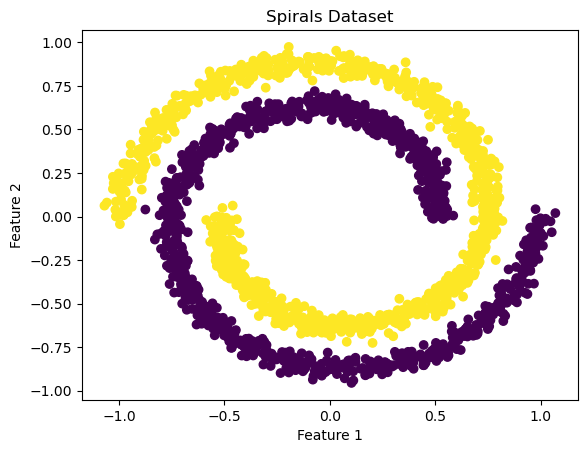

In [19]:
def data_generator():
  n = 1000
  t = np.linspace(0, 2*np.pi, n)
  r = np.linspace(0.5, 1, n)
  x1 = r * np.cos(t) + np.random.randn(n) * 0.033
  y1 = r * np.sin(t) + np.random.randn(n) * 0.033
  x2 = -r * np.cos(t) + np.random.randn(n) * 0.033
  y2 = -r * np.sin(t) + np.random.randn(n) * 0.033
  X = np.vstack((np.hstack((x1, x2)), np.hstack((y1, y2)))).T
  y = np.hstack((np.zeros(n), np.ones(n)))

  return X,y

dataset2_X, dataset2_y = data_generator()
plt.scatter(dataset2_X[:, 0], dataset2_X[:, 1], c=dataset2_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spirals Dataset')
plt.show()


### sample 200 item randomly

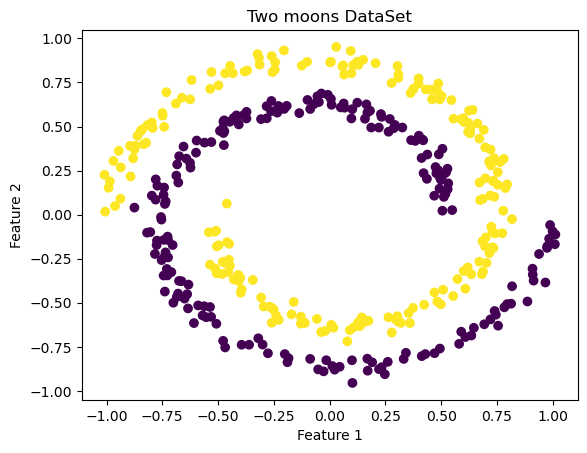

In [20]:
_, X_200, _, y_200 = train_test_split(dataset2_X, dataset2_y, test_size=0.2, random_state=42)
plt.scatter(X_200[:, 0], X_200[:, 1], c=y_200)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two moons DataSet')
plt.show()

Cluster count: 2


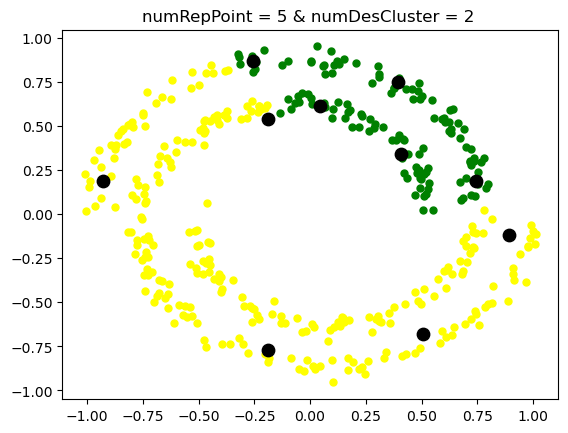

Cluster count: 2


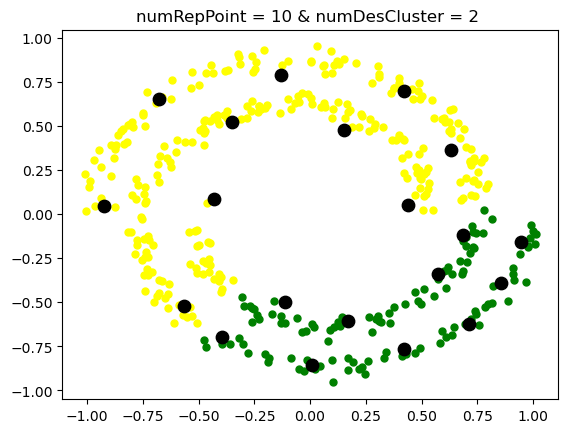

Cluster count: 2


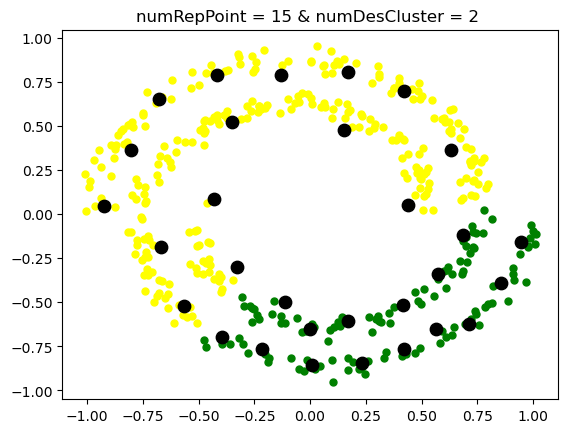

Cluster count: 2


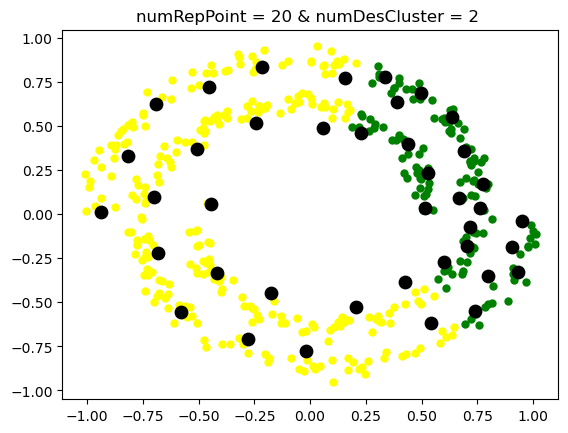

Cluster count: 2


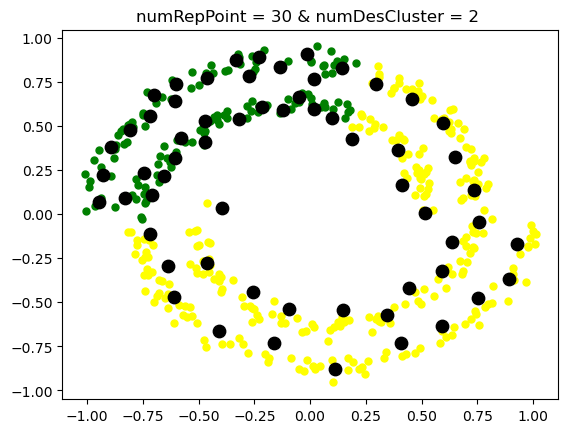

Cluster count: 2


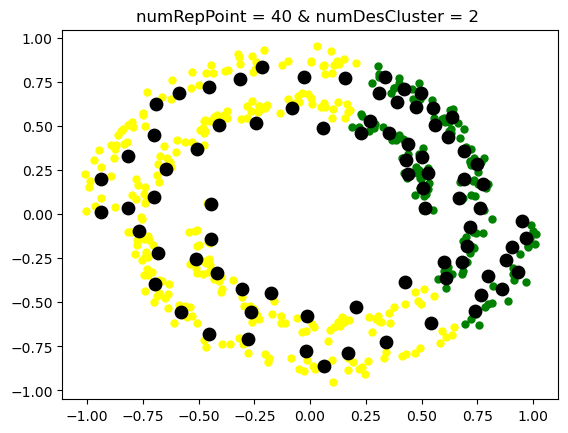

Cluster count: 2


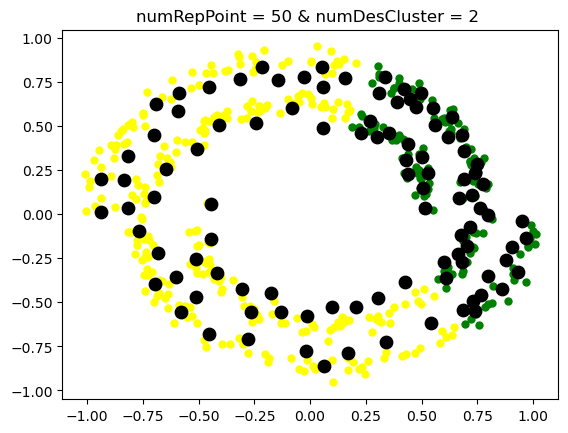

Cluster count: 2


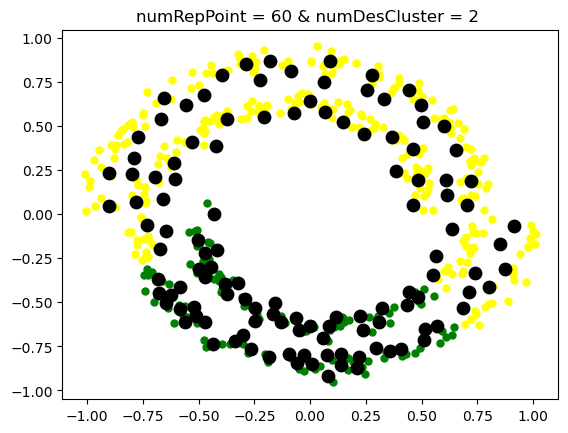

Cluster count: 2


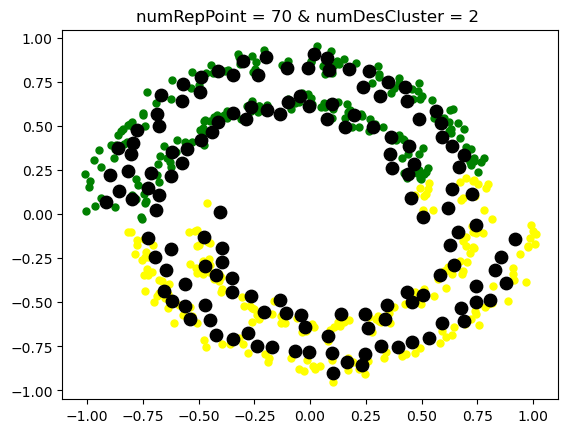

Cluster count: 2


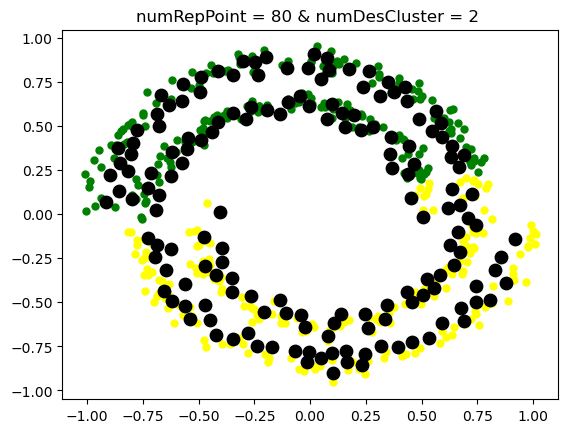

In [21]:
import random
alpha = 0.1
numRepPoints_array = [5,10,15,20,30,40,50,60,70,80]
numDesCluster_array = [2]
data = X_200
data_set = X_200
for numDesCluster in numDesCluster_array:
    for numRepPoints in numRepPoints_array:
        Label_pre,clusters = runCURE(data, numRepPoints, alpha, numDesCluster)
        scatterColors = ['blue', 'green', 'yellow', 'red', 'purple', 'orange', 'brown', 'cyan', 'brown',
                         'chocolate', 'darkgreen', 'darkblue', 'azure', 'bisque']
        Colors = ['white','black']
        for i in range(data_set.shape[0]):
            color = scatterColors[Label_pre[i]]
            plt.scatter(data_set[i, 0], data_set[i, 1], marker='.', c=color,s=100)
#             plt.rcParams["figure.autolayout"] = True
        c_const = 'black'
        for item in clusters:
            for i in range(len(item.repPoints)):
                plt.scatter(item.repPoints[i][0], item.repPoints[i][1], marker='o',edgecolor = 'black',c =c_const ,s=80)
        plt.title(f'numRepPoint = {numRepPoints} & numDesCluster = {numDesCluster} ')
        plt.show()

### numRepPoint = 10 & numDesCluster = 3 could be a reasonable choice

Cluster count: 2


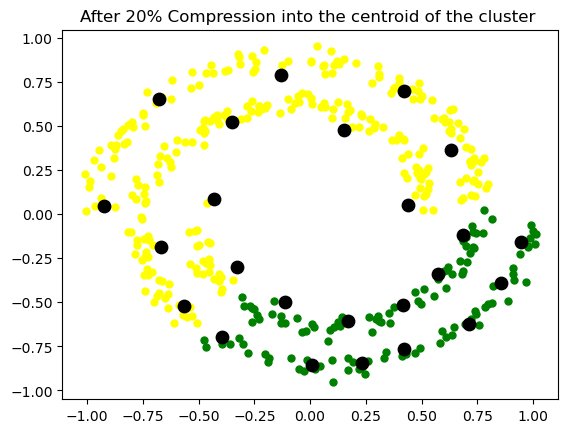

In [22]:
Label_pre,clusters = runCURE(data, 12, 0.1, 2)
scatterColors = ['blue', 'green', 'yellow', 'red', 'purple', 'orange', 'brown', 'cyan', 'brown',
                 'chocolate', 'darkgreen', 'darkblue', 'azure', 'bisque']
Colors = ['white','black']
for i in range(data_set.shape[0]):
    color = scatterColors[Label_pre[i]]
    plt.scatter(data_set[i, 0], data_set[i, 1], marker='.', c=color,s=100)
#             plt.rcParams["figure.autolayout"] = True
c_const = 'black'
for item in clusters:
    for i in range(len(item.repPoints)):
        plt.scatter(item.repPoints[i][0], item.repPoints[i][1], marker='o',edgecolor = 'black',c =c_const ,s=80)
#                 plt.rcParams["figure.autolayout"] = True
plt.title(f'After 20% Compression into the centroid of the cluster ')
plt.show()

### Part C

In [23]:
from scipy.spatial import distance
check_list = []
# cluster_list = []
for i in range(len(clusters)):
    for j in range(len(clusters[i].repPoints)):
        check_list.append((clusters[i].repPoints[j][0], clusters[i].repPoints[j][1],i))
#         cluster_list.append(i)
final_list = []
for point in dataset2_X:
    min_dist = float('inf')
    cluster_index = -1
    for rep_point in check_list:
        if distance.euclidean(point,(rep_point[0],rep_point[1]))<= min_dist:
            min_dist = distance.euclidean(point,(rep_point[0],rep_point[1]))
            cluster_index = rep_point[2]
    final_list.append((point[0],point[1],cluster_index))


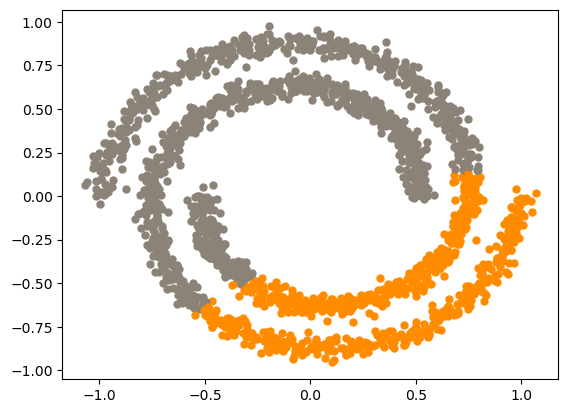

In [24]:
for point in final_list:
    if point[2] == 0:
        plt.scatter(point[0],point[1], marker='.', c="darkorange",s=100)
    if point[2] == 1:
        plt.scatter(point[0],point[1], marker='.', c="#8B8378",s=100)
    if point[2] == 2:
        plt.scatter(point[0],point[1], marker='.', c="olive",s=100)
#     if point[2] == 3:
#         plt.scatter(point[0],point[1], marker='.', c="#8A360F",s=100)
#     if point[2] == 4:
#         plt.scatter(point[0],point[1], marker='.', c="#E3CF57",s=100)
#     if point[2] == 5:
#         plt.scatter(point[0],point[1], marker='.', c="#DC143C",s=100)
        